# ===================================
# 1. Import Libraries
# ===================================

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Set the styles for plots

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


# ===================================
# 2. Load the Google Forms Data
# ===================================
# Replace 'survey.csv' with your file name

In [4]:
df = pd.read_csv("deep-fake-survey.csv")

## Quick preview of data

In [5]:
print("Data Shape:", df.shape)
df.head()

Data Shape: (30, 18)


,Timestamp,I consent to participate in this research study on deepfake cybersecurity threats and understand that all data will remain anonymous.,Are you currently working in one of the following fields?,How familiar are you with the concept of deepfakes?,Have you or your organisation experienced or investigated a deepfake-related incident?,Which of the following do you believe deepfakes can be used for? (Select all that apply),"Does your organisation currently have any policies, protocols or training programs related to deepfakes or synthetic media threats?",How confident are you in your organisation’s ability to detect or respond to deepfake threats?,Has your team received any formal training or awareness sessions related to deepfakes in the last 12 months?,Which of the following tools or methods have you heard of for detecting or verifying deepfakes? (Select all that apply),How effective do you believe current deepfake detection technologies are?,What do you perceive as the main barriers to implementing deepfake detection tools in organisations?,Are you aware of any national or international legal frameworks addressing the regulation of deepfakes or synthetic media?,How sufficient do you believe current legal frameworks are in addressing deepfake-related threats?,"Do you think there should be mandatory detection or labelling of synthetic content shared online (e.g., videos, images)?",Country of residence,Job title / role,Years of professional experience in your field
0,2025/07/28 12:18:58 PM GMT,Yes,NaN,3,No,Pornographic or non-consensual content;Politic...,No,2,No,"AI-based forensic tools (e.g., Deepware, Micro...",3,Cost,No,3,Yes,Ghana,Teaching,3–5
1,2025/07/28 12:34:01 PM GMT,Yes,Cybersecurity;IT Governance / Risk / Complianc...,3,No,Financial fraud / impersonation;Disinformation...,In development,2,Yes,"AI-based forensic tools (e.g., Deepware, Micro...",3,Lack of awareness or training,Yes,3,Yes,Ghana,Blockchain Engineer,3–5
2,2025/07/28 2:11:26 PM GMT,Yes,Technology Policy / Regulation,1,No,Financial fraud / impersonation;Disinformation...,Yes,3,Yes,"AI-based forensic tools (e.g., Deepware, Micro...",4,Lack of regulation or compliance pressure,No,2,Yes,Ghana,IT Instructor,6–10
3,2025/07/28 5:22:14 PM GMT,Yes,Cybersecurity,5,No,Financial fraud / impersonation;Disinformation...,Not sure,1,No,"AI-based forensic tools (e.g., Deepware, Micro...",3,Lack of regulation or compliance pressure,No,2,Yes,UK,Security Analist,0–2
4,2025/07/28 5:34:31 PM GMT,Yes,Information Technology Researcher,5,No,Financial fraud / impersonation;Disinformation...,Yes,5,No,"Browser or platform-level filters (e.g., Meta,...",2,Lack of regulation or compliance pressure,No,1,Yes,USA,Information Technology Researcher,0–2



# 2. Rename Columns for easier access

In [7]:
df.columns = [
    "Timestamp", "Consent", "Profession", "Awareness_Level", "Experienced_Incident",
    "Perceived_Uses", "Has_Policy", "Confidence_Level", "Recent_Training",
    "Tools_Awareness", "Effectiveness_Rating", "Barriers",
    "Policy_Awareness", "Policy_Sufficiency", "Mandatory_Labelling",
    "Country", "Job_Title", "Experience_Years"
]

# 3. Drop Timestamp if not needed

In [ ]:
df.drop(columns=["Timestamp"], inplace=True)

# 4. Replace NaN with 'No Response'

In [8]:
df.fillna("No Response", inplace=True)

# 5. Awareness Level Distribution

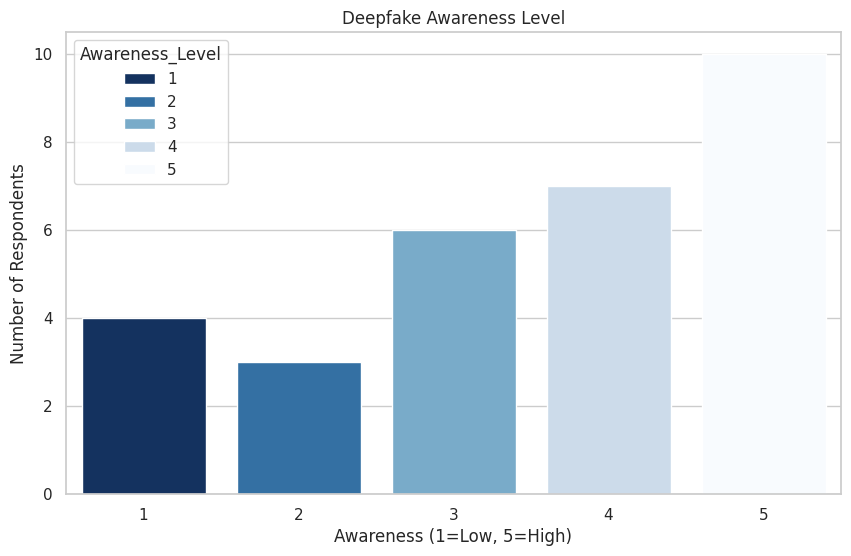

In [11]:
sns.countplot(x="Awareness_Level",hue="Awareness_Level", data=df, palette="Blues_r",)
plt.title("Deepfake Awareness Level")
plt.xlabel("Awareness (1=Low, 5=High)")
plt.ylabel("Number of Respondents")
plt.show()